# Interrupcion Legal de Embarazo CDMX

### Vista general de datos

In [34]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 50)
embarazo = pd.read_csv("/Users/iboa08/Desktop/ML/interrupcion-legal-del-embarazo.csv", engine="python")
#embarazo

### Mini limpieza de datos

In [35]:
embarazo = embarazo.drop("AUTOREF", axis=1)
embarazo = embarazo.drop("H_FINGRESO", axis=1)
embarazo = embarazo.drop("P_CONSENT", axis=1)
embarazo = embarazo.drop("PARENTEZCO", axis=1)

embarazo['OCUPACION'] = embarazo.OCUPACION.fillna('No se dijo')
dict = {"preparatoria completa": "PREPACOM", "secundaria completa": "SECCOM",
       "licenciatura completa": "LICCOM", "primaria completa": "PRIMCOM", 
       "preparatoria incompleta": "PREPINC", "licenciatura incompleta": "LICINC",
       "secundaria incompleta": "SECINC", "ninguno": "NINGUNO"}
embarazo = embarazo.replace({"NIVEL_EDU": dict})

#alcaldia = pd.get_dummies(embarazo['ALC O MUNICIPIO'])
#embarazo = pd.concat([embarazo,alcaldia], axis=1)


### Cantidad de abortos por edad

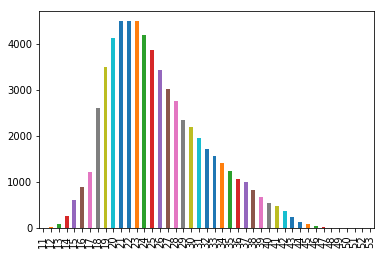

In [32]:
embarazo['EDAD'].value_counts().sort_index().plot.bar()

### Cantidad de abortos por mes

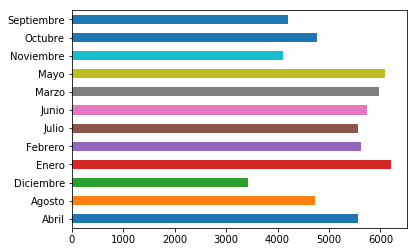

In [86]:
embarazo['MES'].value_counts().sort_index().plot.barh()